2020-02-11T17:48:43+01:00

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
torch 1.4.0
POLO not installed

compiler   : Clang 11.0.0 (clang-1100.0.33.16)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit
host name  : fortytwo
Git hash   : 4085b6f7b3b78dff9088236fa0b9395b5e936566
Git repo   : https://github.com/bicv/POLO/
Git branch : master
800px-Fox_Hunt_1893_Winslow_Homer.jpg
homer.jpg
i05june05_static_street_boston_p1010764.jpeg*
i05june05_static_street_boston_p1010764.npy
i05june05_static_street_boston_p1010785.jpeg*
i05june05_static_street_boston_p1010800.jpeg*
i05june05_static_street_boston_p1010806.jpeg*
i05june05_static_street_boston_p1010808.jpeg*


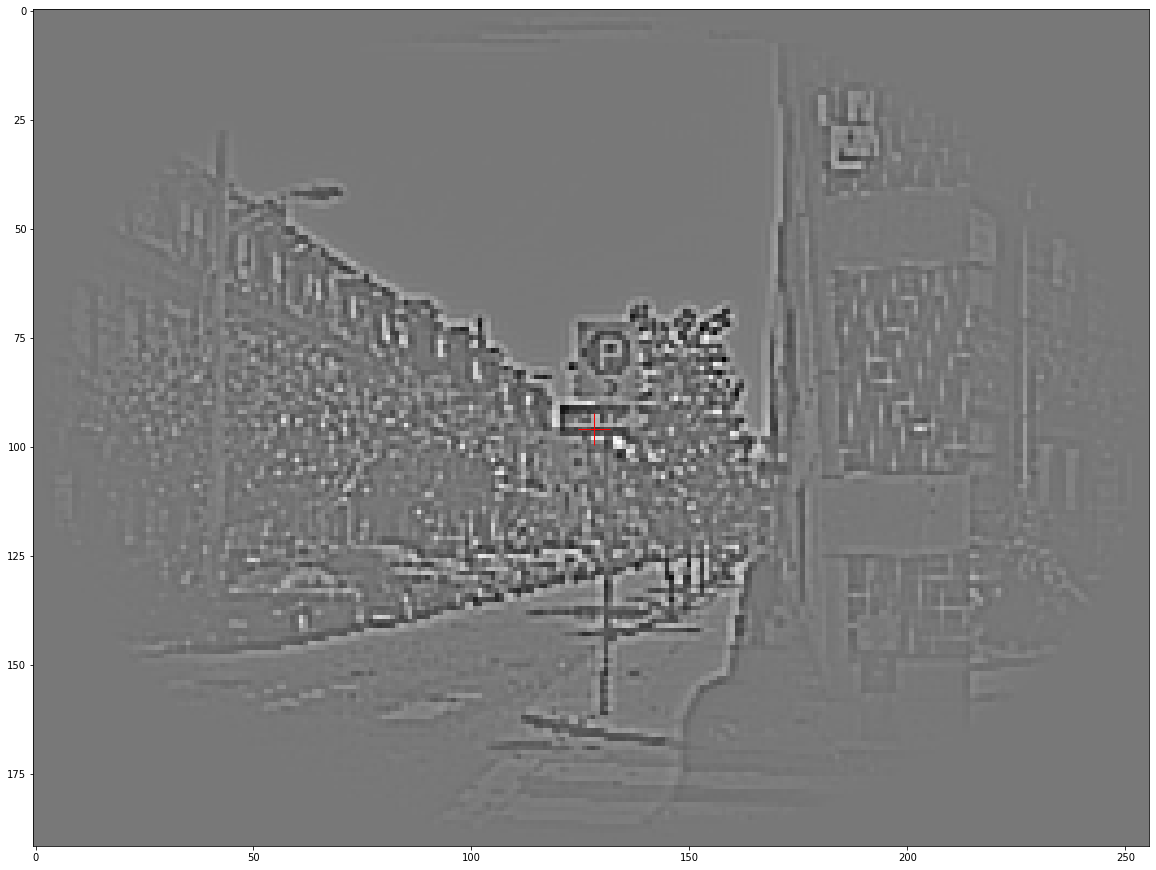

Tensor shape= torch.Size([1, 1, 192, 256])
128 torch.Size([1, 1, 96, 128])
Tensor shape= torch.Size([1, 1, 96, 128]) , n_levels= 1
64 torch.Size([1, 1, 48, 64])
Tensor shape= torch.Size([1, 1, 48, 64]) , n_levels= 2
32 torch.Size([1, 1, 24, 32])
Tensor shape= torch.Size([1, 1, 24, 32]) , n_levels= 3
Tensor shape= torch.Size([1, 3, 32, 32])


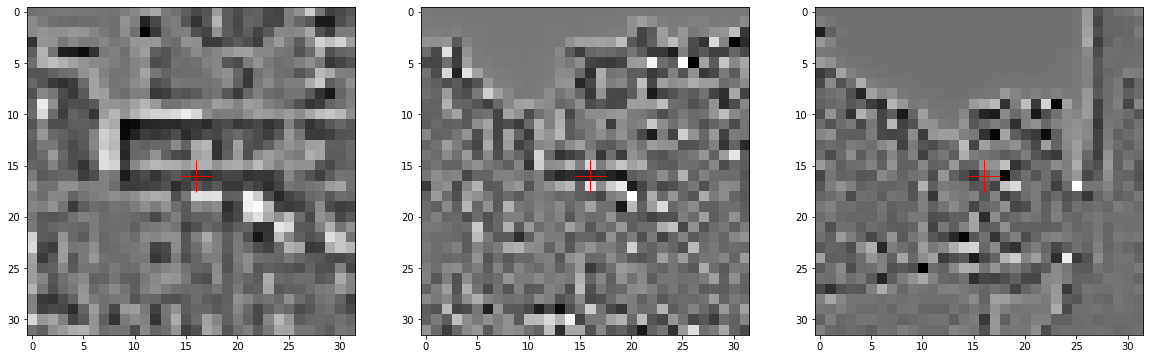

lg shape= 32 32
K shape= (32, 32)
K min max= -0.4102999708906189 1.0


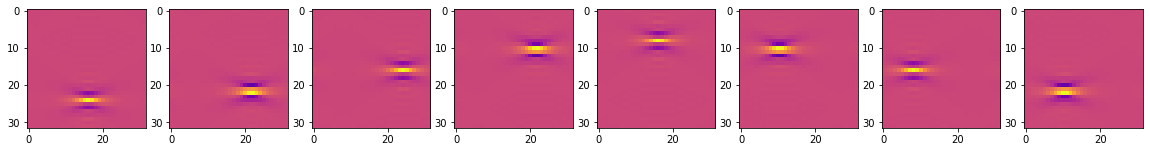

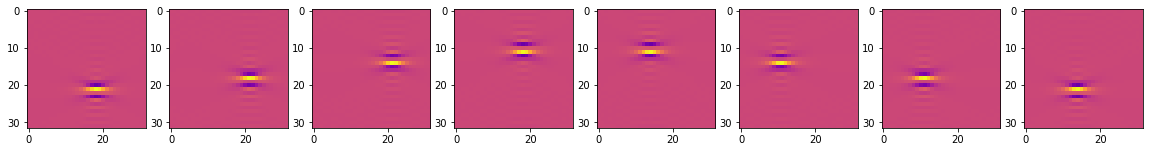

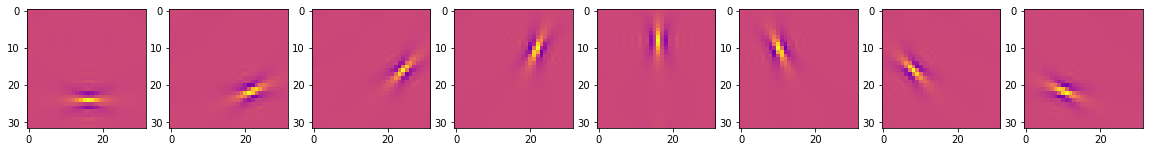

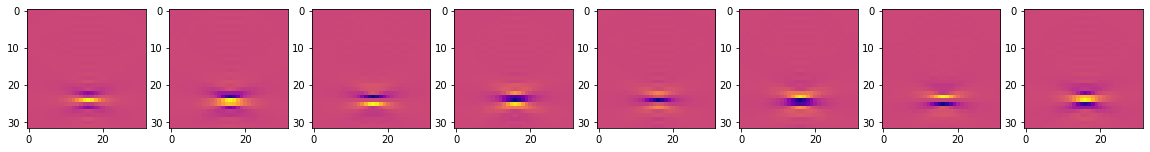

i_sublevel, sf_0, radius 0 0.25 8.0
i_sublevel, sf_0, radius 1 0.3535533905932738 5.65685424949238
K shape= torch.Size([32, 32, 2, 12, 12, 2])
K min max= tensor(-1.) tensor(1.)
Tensor shape= torch.Size([32, 32, 2, 12, 12, 2])
Tensor shape= torch.Size([1, 3, 32, 32])
86.2 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Tensor shape= torch.Size([1, 3, 2, 12, 12, 2])
Tensor shape= torch.Size([1, 3, 32, 32])


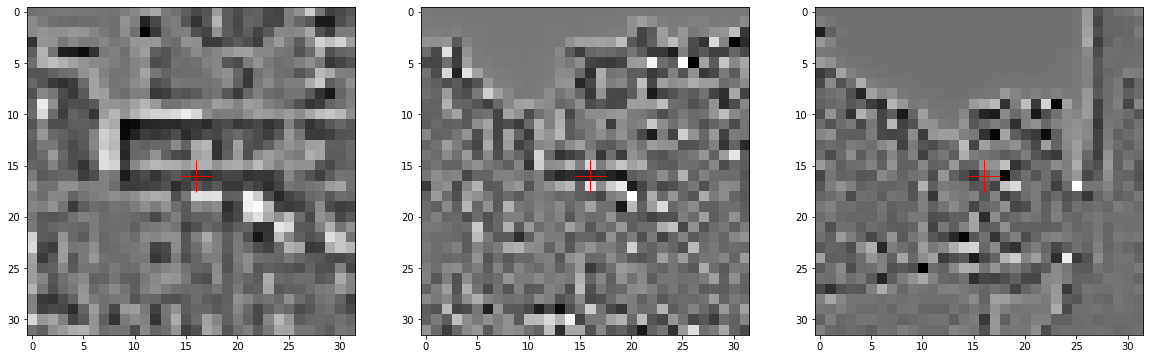

Tensor shape= torch.Size([32, 32, 2, 12, 12, 2])
Tensor shape= torch.Size([1024, 576])
Tensor shape= torch.Size([1, 3, 2, 12, 12, 2])
Tensor shape= torch.Size([1, 3, 576])
Tensor shape= torch.Size([576, 1024])
Tensor shape= torch.Size([1, 3, 32, 32])
Tensor shape= torch.Size([1, 3, 32, 32])


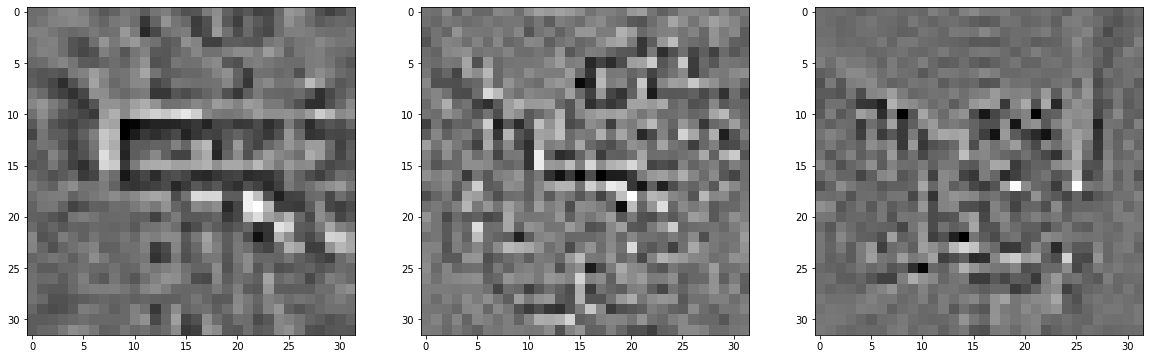

0 torch.Size([512, 1, 192, 256]) torch.Size([512, 3, 2, 12, 12, 2])
using cpu


In [1]:
%run 2020-02-11_retina_reconstruction.ipynb

In [ ]:
fname = '2020-02-11_retina_reconstruction-SGD'
try:
    invert = torch.load(f'/tmp/{fname}.pt')
except:
    import time
    n_in, n_out = n_levels*n_sublevel*n_azimuth*n_theta*n_phase, np.prod(img_orig.shape)
    invert = Invert(n_in=n_in, n_out=n_out, verbose=True)

    # set a relative precision required proportional to the mask
    mask_ = im.mask.ravel()
    mask_ = torch.from_numpy(mask_[None, None, :])
    #print(mask_.shape)
    
    def init_weights(m):
        m.weight.data = K.std() * torch.randn_like(m.weight.data) 
    invert.KT.apply(init_weights)
              
    invert = invert.to(device)

    #optimizer = torch.optim.SGD(params, lr=lr)
    optimizer = torch.optim.SGD(invert.parameters(), lr=lr, momentum=.5, dampening=0, weight_decay=0.01, nesterov=True)
    criterion = torch.nn.MSELoss() 

    # ----------
    #  Training
    # ----------
    loss_0 = None
    invert.train()
    for epoch in range(n_epochs):
        t_batch = time.time()
        for batch_idx, (target, x) in enumerate(dataloader):
            target = target.squeeze(1)
            target = target.reshape((target.shape[0], target.shape[1]*target.shape[2]))
            x = x.reshape((target.shape[0], n_levels*n_sublevel*n_azimuth*n_theta*n_phase))

            target, x = target.to(device), x.to(device)

            optimizer.zero_grad()
            im_rec = invert(x)
            if loss_0 is None:
                loss_0 = criterion(target*mask_, torch.zeros_like(target))
            loss = criterion(target*mask_, im_rec*mask_) / loss_0
            loss.backward()
            optimizer.step()

        print("[Epoch %d/%d][loss: %f] [Time: %fs]" % (epoch+1, n_epochs, loss.item(), time.time()-t_batch))

    invert.eval()
    torch.save(invert, f'/tmp/{fname}.pt')

n_in, n_out= 1728 49152
[Epoch 1/1000][loss: 98.712441] [Time: 2.649379s]
[Epoch 2/1000][loss: 98.463879] [Time: 2.155861s]
[Epoch 3/1000][loss: 98.174847] [Time: 2.049095s]
[Epoch 4/1000][loss: 97.866339] [Time: 1.687724s]
[Epoch 5/1000][loss: 97.548845] [Time: 2.026409s]
[Epoch 6/1000][loss: 97.227601] [Time: 2.044755s]
[Epoch 7/1000][loss: 96.905220] [Time: 2.092962s]
[Epoch 8/1000][loss: 96.583002] [Time: 1.831489s]
[Epoch 9/1000][loss: 96.261593] [Time: 1.946172s]
[Epoch 10/1000][loss: 95.941311] [Time: 2.053385s]
[Epoch 11/1000][loss: 95.622311] [Time: 2.089783s]
[Epoch 12/1000][loss: 95.304667] [Time: 1.887724s]
[Epoch 13/1000][loss: 94.988410] [Time: 1.814291s]
[Epoch 14/1000][loss: 94.673553] [Time: 2.102740s]
[Epoch 15/1000][loss: 94.360099] [Time: 2.076601s]
[Epoch 16/1000][loss: 94.048044] [Time: 2.161521s]
[Epoch 17/1000][loss: 93.737383] [Time: 1.727404s]
[Epoch 18/1000][loss: 93.428109] [Time: 2.100489s]
[Epoch 19/1000][loss: 93.120216] [Time: 2.072871s]
[Epoch 20/1000][

## reconstructing one image

In [ ]:
img_tens = torch.Tensor(img_orig[None, None, ...])

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img_tens[0, 0, ...].detach().numpy(), cmap='gray')
ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);

In [ ]:
x = torch.tensordot(cropped_pyramid(img_tens), K, dims=2)
x = x.reshape((1, n_levels*n_sublevel*n_azimuth*n_theta*n_phase))
im_rec = invert(x).reshape(img_tens.shape)
print(im_rec.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(im_rec[0, 0, ...].detach().numpy(), cmap='gray')
ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);